In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import KMeans

# Artigo WCDE 2017 

https://sites.google.com/view/wcde/p%C3%A1gina-inicial?authuser=0 

Autores: Thiago Medeiros Barros, Luiz Affonso Guedes

Resumo: modelar e clusterizar a distribuição de notas dos alunos em disciplinas e cursos. 

Dados já foram limpos com um total de 34799 instância com 43 atributos, sendo eles: 
'aluno_exclusivo_rede_publica', 'aluno_id', 'ano_letivo_ano',
       'ano_letivo__ano_aluno', 'categorias', 'cep', 'ch_hora_relogio',
       'codigo_censup', 'codigo_siape', 'descricao', 'descricao_afastamento',
       'descricao_area_residencial', 'descricao_companhia_domiciliar',
       'descricao_estado_civil', 'descricao_historico', 'descricao_imovel',
       'descricao_internet', 'descricao_mae_escolaridade',
       'descricao_pai_escolaridade', 'descricao_raca',
       'descricao_responsavel_escolaridade',
       'descricao_responsavel_financeiro', 'descricao_saude',
       'descricao_situacao_matricula', 'descricao_trabalho',
       'descricao_trabalho_responsavel', 'ensino_fundamental_conclusao',
       'ficou_tempo_sem_estudar', 'inativo_siape', 'local_acesso_internet',
       'media_final', 'nome_escola_ensino_fundamental',
       'nome_escola_ensino_medio', 'percentual_frequencia', 'periodo_letivo',
       'pessoa_fisica_nascimento_data', 'possui_necessidade_especial',
       'qnt_pc', 'qtd_filhos', 'qtd_pessoas_domicilio',
       'quantidade_smartphones', 'renda_bruta_familiar', 'tempo_sem_estudar'

In [10]:
dados = pd.read_json('dadoslimpos.json')

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

É exibido a distribuição das notas em uma disciplina a partir do gráfico violino (https://en.wikipedia.org/wiki/Violin_plot) e realizado o teste estatístico (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html, https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) se a distribuição se comporta como uma Normal.

A partir dos gráficos abaixo é nitidamente verificado que as notas não seguem uma distribuição normal, mas, aparentemente, uma distribuição bimodal. 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


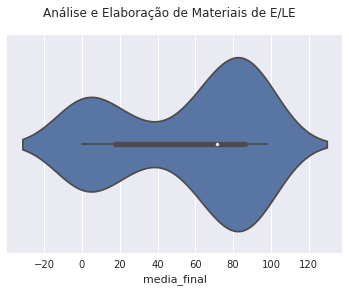

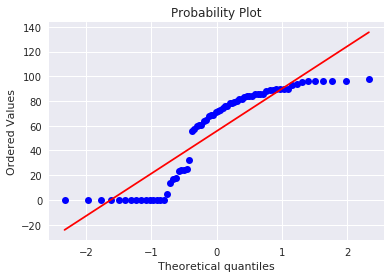

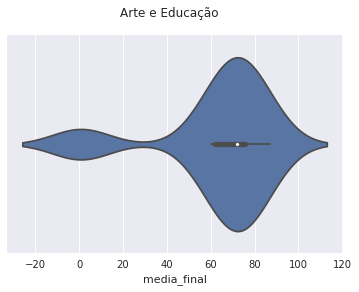

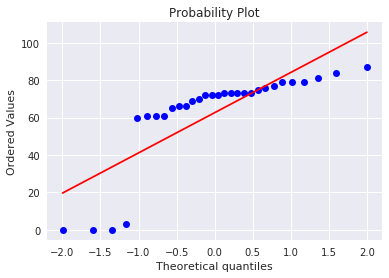

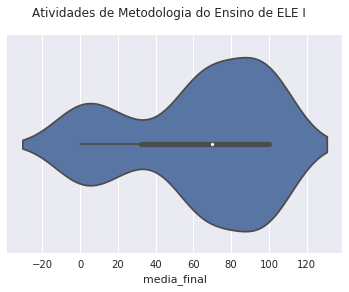

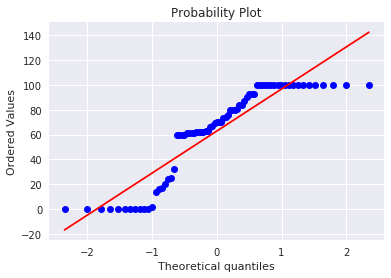

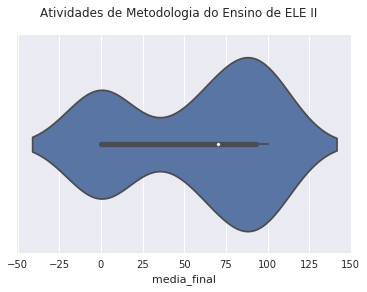

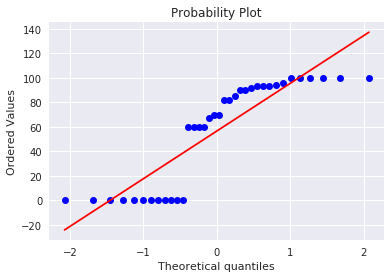

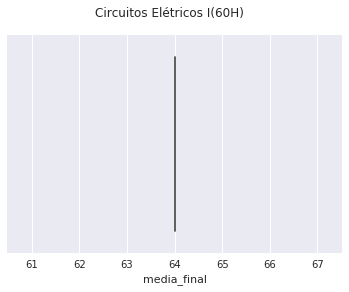

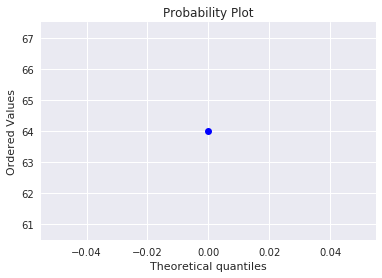

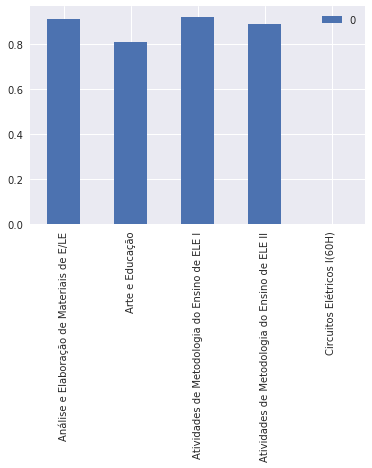

In [11]:
#gerando graficos
%matplotlib inline

plt.close('all')

cnt = 0

r = []
i = []

#loop sobre cada disciplina
for index1, group1 in dados.groupby(['descricao_historico']):    
    fig = plt.figure()
    sns.plt.suptitle(index1)
    sns.violinplot(dados[dados.descricao_historico == index1]['media_final'])
    
    fig = plt.figure()
    o, res = stats.probplot(dados[dados.descricao_historico == index1]['media_final'], plot=plt)    
    r.append(res[2])
    i.append(index1)
    
    cnt += 1
    if cnt == 5:
        break

df = pd.DataFrame(data=r, index=i)

fig = plt.figure()
df.plot.bar()

É realizado a clusterização por disciplina em dois grupos (provavelmente alunos aprovado e reprovados). 
É criado dentro do frame um novo atributo chamado 'classe_disciplina', o qual identifica a qual grupo aquele aluno pertence. 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/ubuntu/an

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


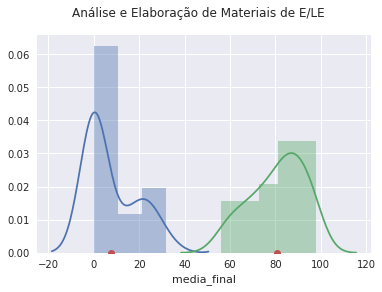

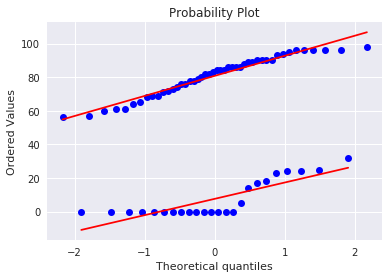

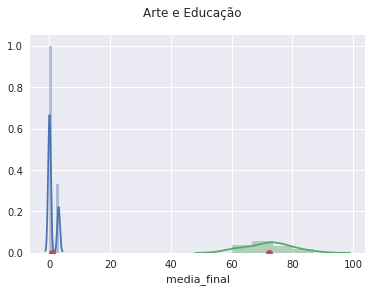

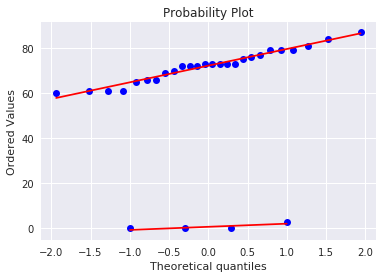

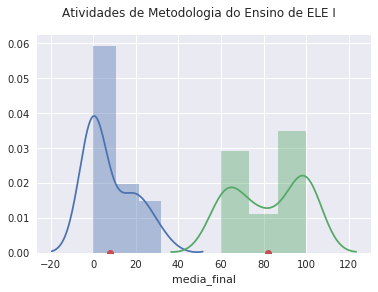

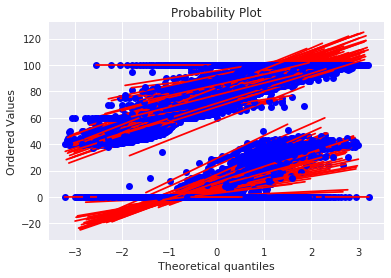

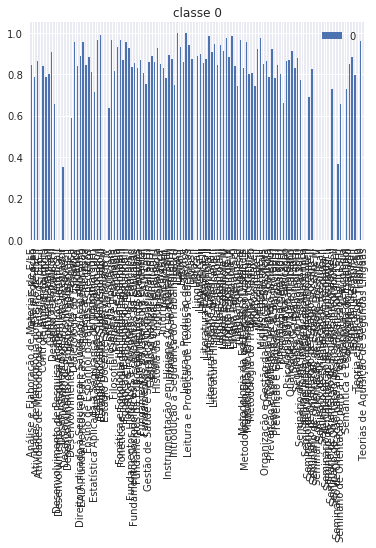

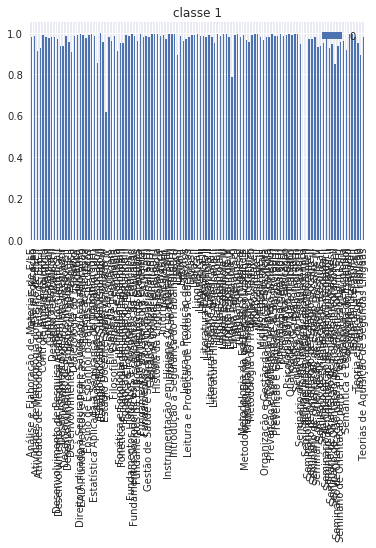

In [12]:
%matplotlib inline
plt.close('all')

#cria coluna 'classe' no frame dados inicializado com -1, a fim de controle
dados['classe_disciplina'] = np.ones(dados.shape[0])*-1

#definir linha que divide os clusters
cnt = 0
r1 = []
r2 = []
i = []

for index1, group1 in dados.groupby(['descricao_historico']):    
    
    #recuperando as notas apenas daquela disciplina    
    data = dados[dados.descricao_historico == index1]['media_final']
    
    #restrição mínima de 10 instâncias  
    if data.count() < 10:
        continue
    
    #recuperando os clusters
    cluster = KMeans(n_clusters=2, init=np.array([[0], [10]]))
    cluster.fit(data.reshape(-1,1))
    #print(cluster.cluster_centers_)
        
    #atribuindo a classe
    dados.loc[dados.descricao_historico == index1, 'classe_disciplina'] = cluster.predict(data.reshape(-1,1))
    
    #controle para exibir os gráficos
    if cnt < 3:    
        #figura mostrando a clusterizacao
        fig = plt.figure()
        sns.plt.suptitle(index1)
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)]['media_final'] )
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)]['media_final'] )
        plt.plot(cluster.cluster_centers_, [0, 0], "o")

        #figura mostrando o ajuste dos dados aos clusters
        fig = plt.figure()

    o, res1 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)]['media_final'], plot=plt)
    o, res2 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)]['media_final'], plot=plt)
    
    r1.append(res1[2])
    r2.append(res2[2])
    i.append(index1)
    
    cnt += 1

df = pd.DataFrame(data=r1, index=i)
fig = plt.figure()
df.plot.bar(title='classe 0')

df = pd.DataFrame(data=r2, index=i)
fig = plt.figure()
df.plot.bar(title='classe 1')

É feito agora uma análise a partir da tabela de contigência entre o atributo "situação da disciplina" e a classe atribuída pelo kmeans

In [13]:
tbl = pd.crosstab(index = dados.descricao_situacao_disciplina , columns = dados.classe_disciplina, margins=True)
tbl

classe_disciplina,-1.0,0.0,1.0,All
descricao_situacao_disciplina,,,,
Aprovado,81,1168,22221,23470
Aprovado/Reprovado no Módulo,0,46,118,164
Cancelado,2,292,1,295
Dispensado,0,2,0,2
Pendente,0,1,0,1
Reprovado,2,8672,1524,10198
Reprovado por falta,0,14,0,14
Trancado,0,189,1,190
Transferido,0,3,0,3


# ABAIXO AINDA EM TESTE


É realizado a clusterização para 3 grupos com os núcleos iniciando em 0, 5 e 10, a fim de tentar modelar os possíveis grupos: evadidos, reprovados e aprovados. 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


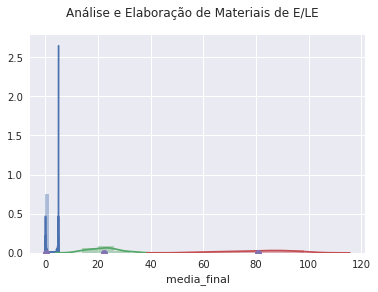

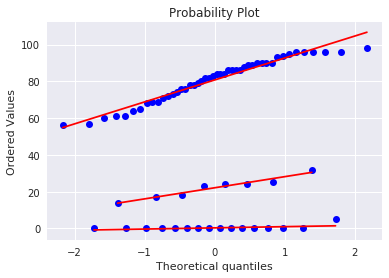

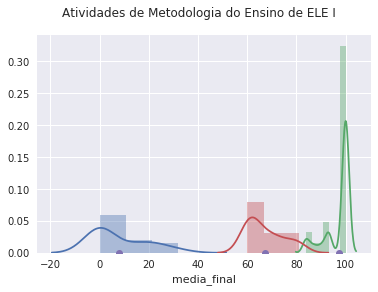

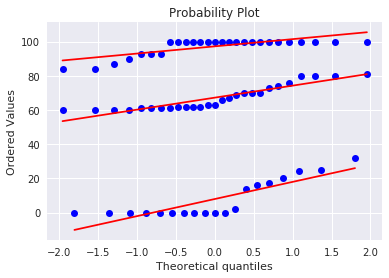

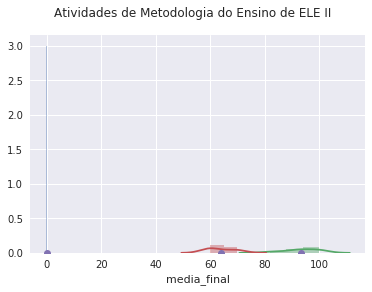

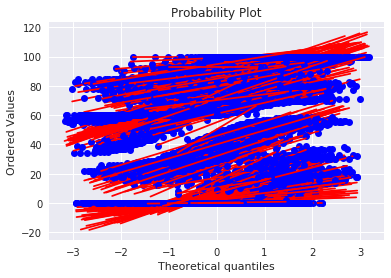

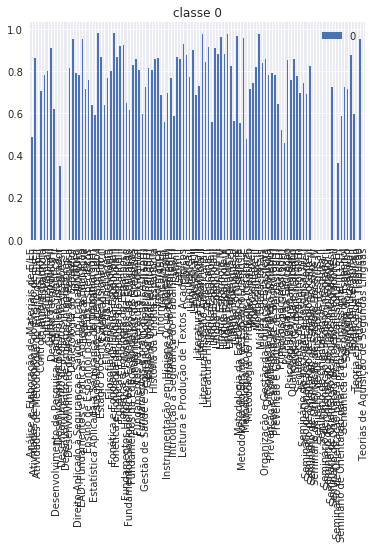

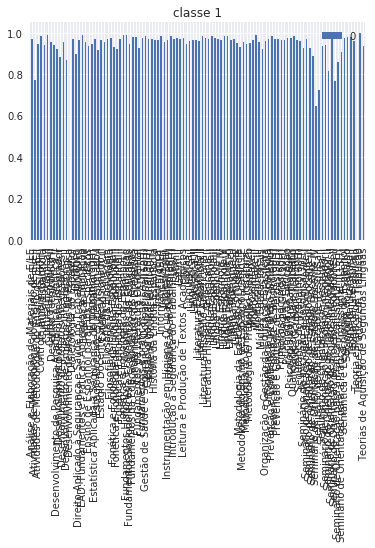

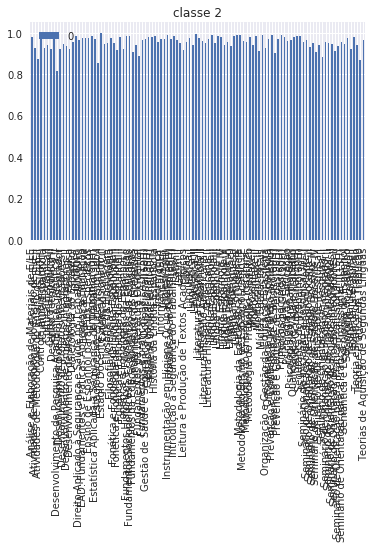

In [5]:
%matplotlib inline
plt.close('all')

#cria coluna 'classe' no frame dados inicializado com -1, a fim de controle
dados['classe_disciplina'] = np.ones(dados.shape[0])*-1

#definir linha que divide os clusters
cnt = 0
r1 = []
r2 = []
r3 = []
i = []

for index1, group1 in dados.groupby(['descricao_historico']):    
    
    #recuperando as notas apenas daquela disciplina    
    data = dados[dados.descricao_historico == index1]['media_final']
    
    #restrição mínima de 10 instâncias  
    if data.count() < 10:
        continue
    
    #recuperando os clusters
    cluster = KMeans(n_clusters=3, init=np.array([[0], [5], [10]]))
    cluster.fit(data.reshape(-1,1))
        
    #atribuindo a classe
    dados.loc[dados.descricao_historico == index1, 'classe_disciplina'] = cluster.predict(data.reshape(-1,1))
    
    #restringindo com pelo menos 2 instancias para cada classe
    if dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)].shape[0] < 2:
        continue
    
    if dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)].shape[0] < 2:
        continue
        
    if dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 2)].shape[0] < 2:
        continue
    
    #controle para exibir os gráficos
    if cnt < 3:    
        #figura mostrando a clusterizacao
        fig = plt.figure()
        sns.plt.suptitle(index1)
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)]['media_final'] )
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)]['media_final'] )
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 2)]['media_final'] )
        plt.plot(cluster.cluster_centers_, [0, 0, 0], "o")

        #figura mostrando o ajuste dos dados aos clusters
        fig = plt.figure()

    #calculo estatistico para verificar se a distribuicao segue uma normal
    o, res1 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)]['media_final'], plot=plt)
    o, res2 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)]['media_final'], plot=plt)
    o, res3 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 2)]['media_final'], plot=plt)
    
    r1.append(res1[2])
    r2.append(res2[2])
    r3.append(res3[2])
    i.append(index1)
    
    cnt += 1

df = pd.DataFrame(data=r1, index=i)
fig = plt.figure()
df.plot.bar(title='classe 0')

df = pd.DataFrame(data=r2, index=i)
fig = plt.figure()
df.plot.bar(title='classe 1')

df = pd.DataFrame(data=r3, index=i)
fig = plt.figure()
df.plot.bar(title='classe 2')

In [8]:
#tbl = pd.crosstab(index = dados.descricao_situacao_disciplina , columns = dados.classe_disciplina, margins=True, normalize=True)
tbl = pd.crosstab(index = dados.descricao_situacao_disciplina , columns = dados.classe_disciplina, margins=True)
tbl


classe_disciplina,-1.0,0.0,1.0,2.0,All
descricao_situacao_disciplina,,,,,
Aprovado,81,1118,3669,18602,23470
Aprovado/Reprovado no Módulo,0,46,53,65,164
Cancelado,2,287,5,1,295
Dispensado,0,2,0,0,2
Pendente,0,1,0,0,1
Reprovado,2,7173,2566,457,10198
Reprovado por falta,0,14,0,0,14
Trancado,0,188,1,1,190
Transferido,0,3,0,0,3


In [6]:
dados

,aluno_exclusivo_rede_publica,aluno_id,ano_letivo__ano,ano_letivo__ano_aluno,categorias,cep,ch_hora_relogio,codigo_censup,codigo_siape,descricao,descricao_afastamento,descricao_area_residencial,descricao_companhia_domiciliar,descricao_estado_civil,descricao_historico,descricao_imovel,descricao_internet,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_saude,descricao_situacao_disciplina,descricao_situacao_matricula,descricao_trabalho,descricao_trabalho_responsavel,ensino_fundamental_conclusao,ficou_tempo_sem_estudar,inativo_siape,local_acesso_internet,media_final,nome_escola_ensino_fundamental,nome_escola_ensino_medio,percentual_frequencia,periodo_letivo,pessoa_fisica__nascimento_data,possui_necessidade_especial,qnt_pc,qtd_filhos,qtd_pessoas_domicilio,quantidade_smartphones,renda_bruta_familiar,tempo_sem_estudar,classe_disciplina
0,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Introdução ao Direito(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Aprovado,Transferido Externo,Serviço público,Serviço público,2000,1,False,missing,85,Colégio Salesiano São José,Colégio Salesiano São José,100,1,17/06/1986,True,1,1,1,1,1911.3,-1,2.0
1,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Introdução à Segurança do Trabalho(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Aprovado,Transferido Externo,Serviço público,Serviço público,2000,1,False,missing,80,Colégio Salesiano São José,Colégio Salesiano São José,90,1,17/06/1986,True,1,1,1,2,1911.3,-1,2.0
10,True,471409825937,2016,2015,D,59082-420,60,0,9,Técnico de Nível Médio em Segurança do Trabalh...,missing,Urbana,Sozinho(a),Casado(a),Gestão de Saúde e Segurança Ocupacional(60H),Financiado,missing,Ensino médio incompleto,Ensino superior completo,Não declarado,Ensino superior completo,O próprio aluno,missing,Aprovado,Transferido Externo,Serviço público,Serviço público,2000,1,False,missing,100,Colégio Salesiano São José,Colégio Salesiano São José,95,2,17/06/1986,True,1,1,1,0,1911.3,-1,2.0
100,False,441086102305,2016,2014,E,59156-825,30,3,4,Técnico de Nível Médio em Segurança do Trabalh...,Nunca parou de estudar,Urbana,Cônjuge,União Estável,Qualidade de Vida e Trabalho,Financiado,Diariamente,Ensino superior incompleto,Não conhece,Parda,Ensino superior completo,O próprio aluno,missing,Aprovado,Transferido Externo,Serviço público,Serviço público,0,1,False,casa,97,missing,Escola Estadual Lourdes Guilherme,100,1,15/10/1985,True,1,0,2,1,1600.0,0,2.0
1000,False,407288366201,2014,2014,C,59151-903,10,1,1,Técnico de Nível Médio em Segurança do Trabalh...,Necessidade de trabalhar para ajudar no susten...,Urbana,Cônjuge,União Estável,Seminário de Integração Acadêmica(10H),Próprio,Diariamente,Ensino médio completo,Ensino fundamental incompleto,Branca,Pós graduação completo,O próprio aluno,missing,Aprovado,Transferido Externo,Serviço público,Serviço público,0,1,False,CASA,0,missing,DINÂMICO,100,1,17/02/1972,False,2,3,7,1,7000.0,11,0.0
10000,False,407299518729,2014,2014,E,59140-390,60,2,6,Técnico de Nível Médio em Segurança do Trabalh...,Outra razão,Urbana,Sozinho(a),Solteiro(a),Introdução à Segurança do Trabalho(60H),Próprio,Diariamente,Ensino médio completo,Ensino médio completo,Preta,Ensino médio completo,O próprio aluno,Sistema Único de Saúde - SUS,Aprovado,Cancelado,Trabalha com vínculo empregatício,Não informado,1996,0,False,trabalho,74,ESCOLA ESTADUAL ANTONIO DE SOUZA,escola estadual presidente roosevelt,100,2,23/05/1979,False,1,0,1,0,800.0,0,2.0
10001,False,407299518729,2014,2014,E,59140-390,30,2,6,Técnico de Nível Médio em Segurança do Trabalh...,Outra razão,Urbana,